In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

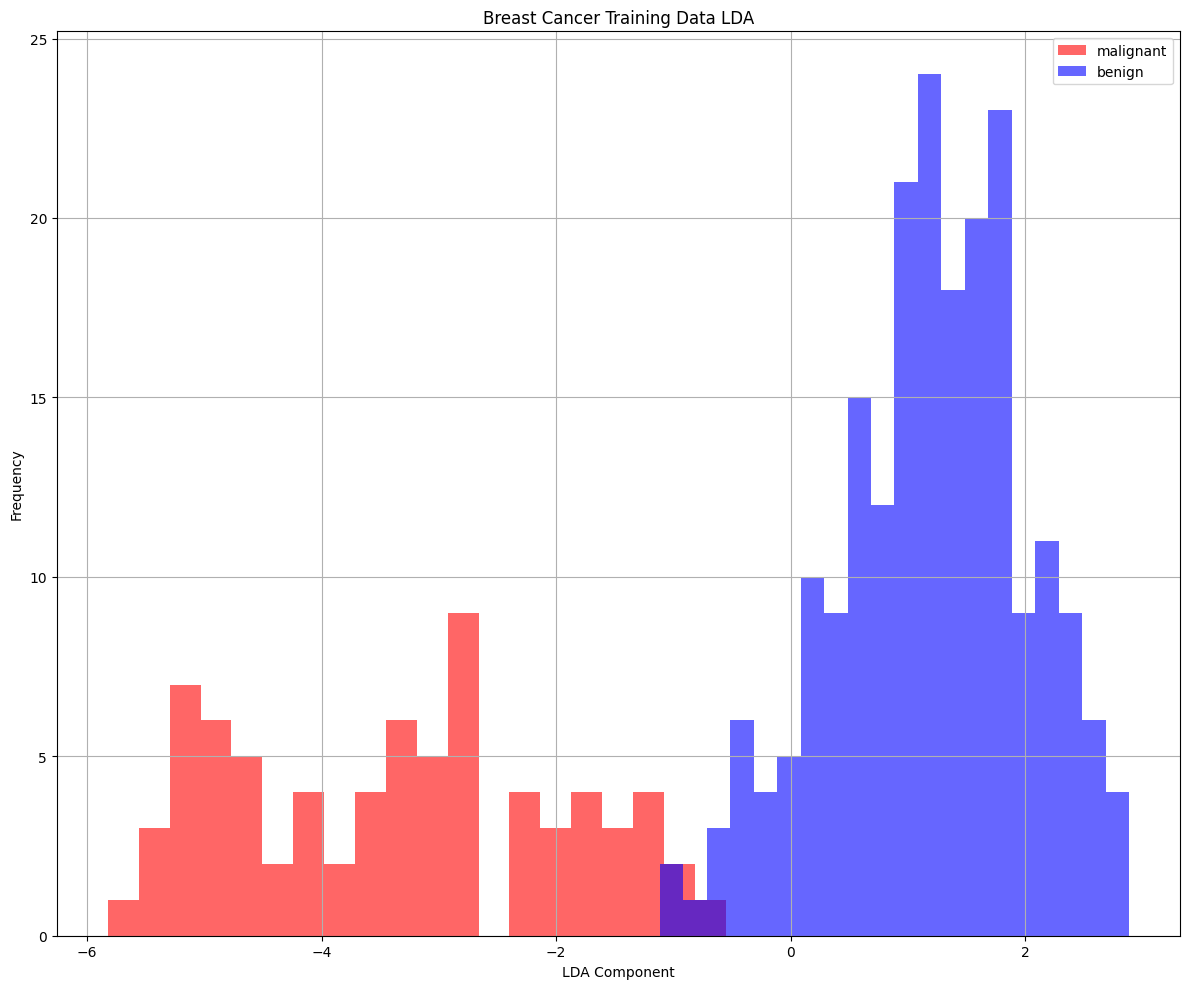

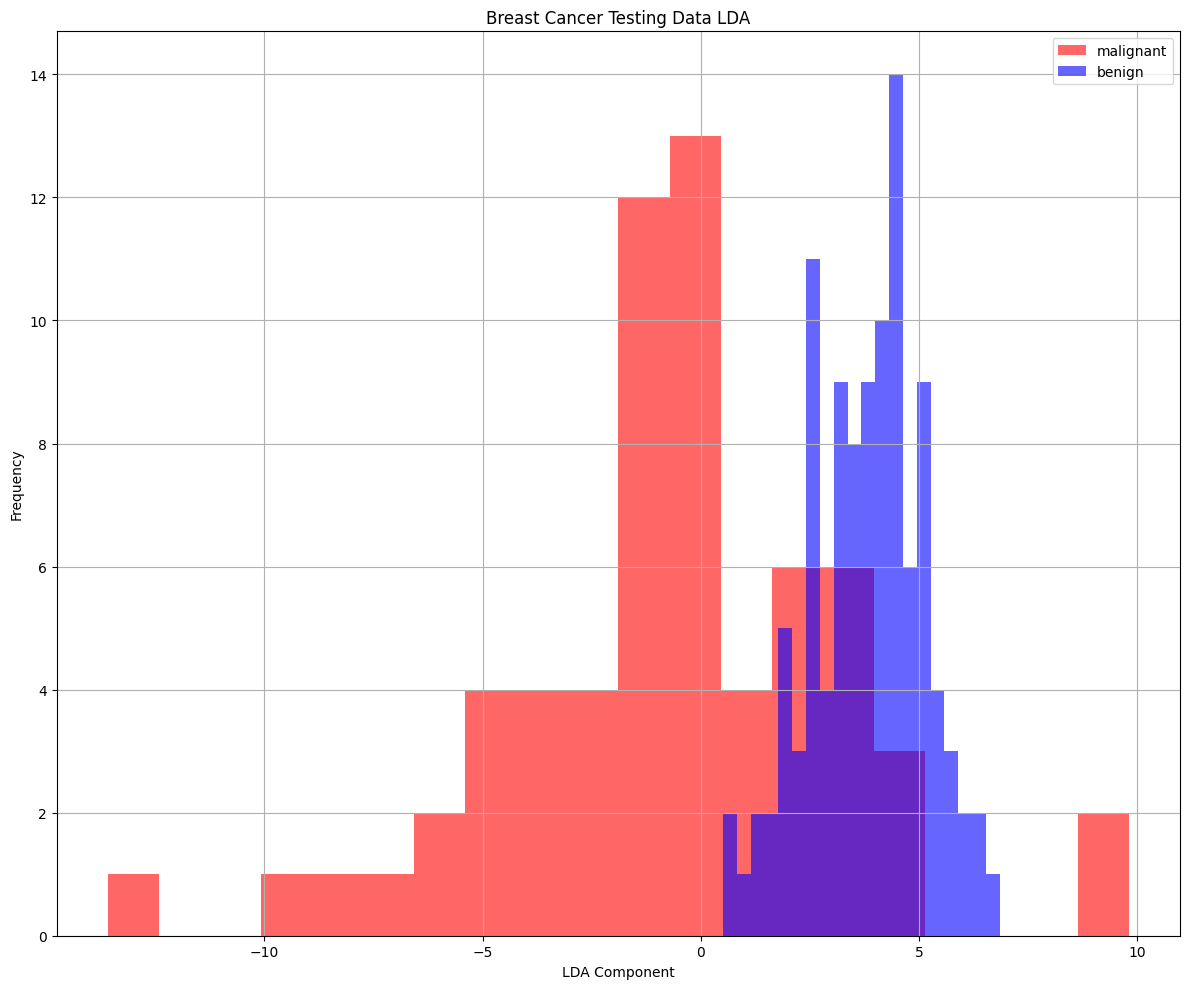

[I 2025-04-27 11:09:17,331] A new study created in memory with name: no-name-6a7b4561-a02c-4694-8872-e18fd206425c
/Users/mark/dev/big19/ML_dev/BigData19-ML-Projects/my_package/mlhelper.py:438: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
/Users/mark/dev/big19/ML_dev/BigData19-ML-Projects/my_package/mlhelper.py:440: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 0.0001, 10) if kernel != 'linear' else 'auto'
[I 2025-04-27 11:09:17,346] Trial 0 finished with value: 0.9791288566243193 and parameters: {'C': 2.505260587735031, 'kernel': 'rbf', 'gamma': 1.0630193265705254, 'max_iter': 8831}

Best trial:
Accuracy: 0.9895946763460376
Best hyperparameters:  {'C': 0.05523044658376706, 'kernel': 'linear', 'max_iter': 3820}


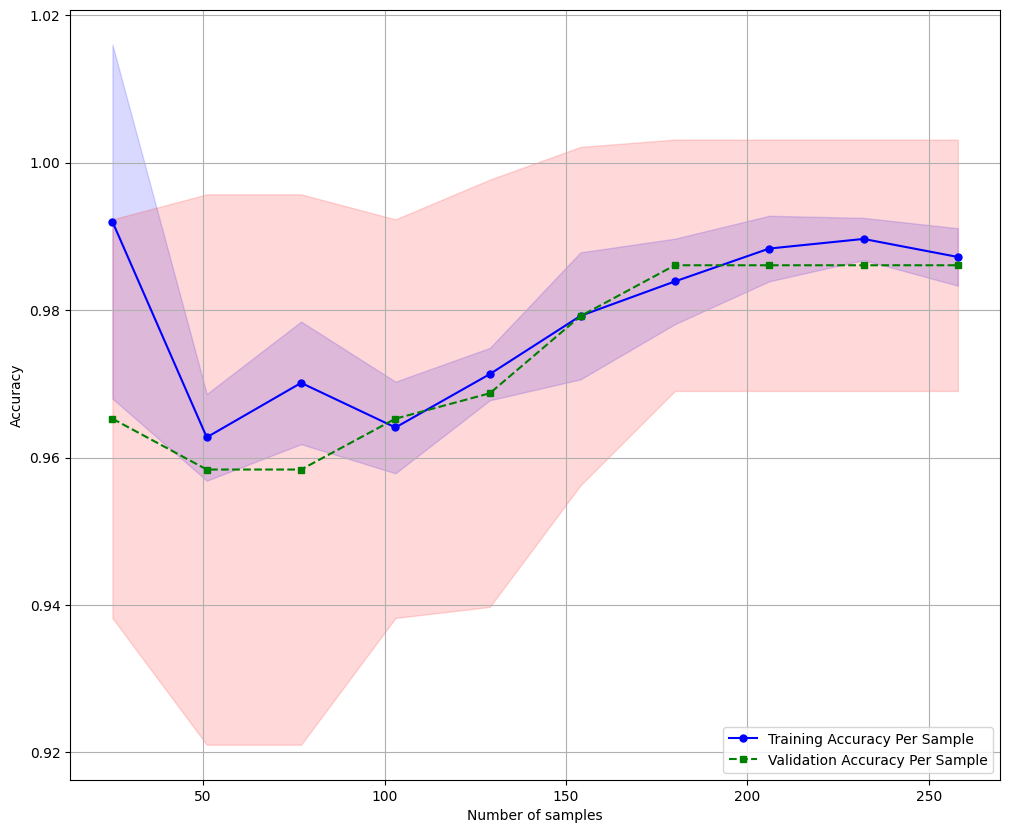

Confusion Matrix
[[ 25  39]
 [  0 107]]
Accuracy: 0.7719, Precision: 0.7329, Recall: 1.0000, F1: 0.8458, AUC: 0.8949


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)